# Importing Relevant libraries

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [249]:
df= pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA and Preprocessing

In [250]:
df.info()
# there are 3 numerical and 3 categorical values are there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [251]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [252]:
df.shape

(1338, 7)

In [253]:
#lets find how many missing values are there
df.isna().sum()
#there are no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

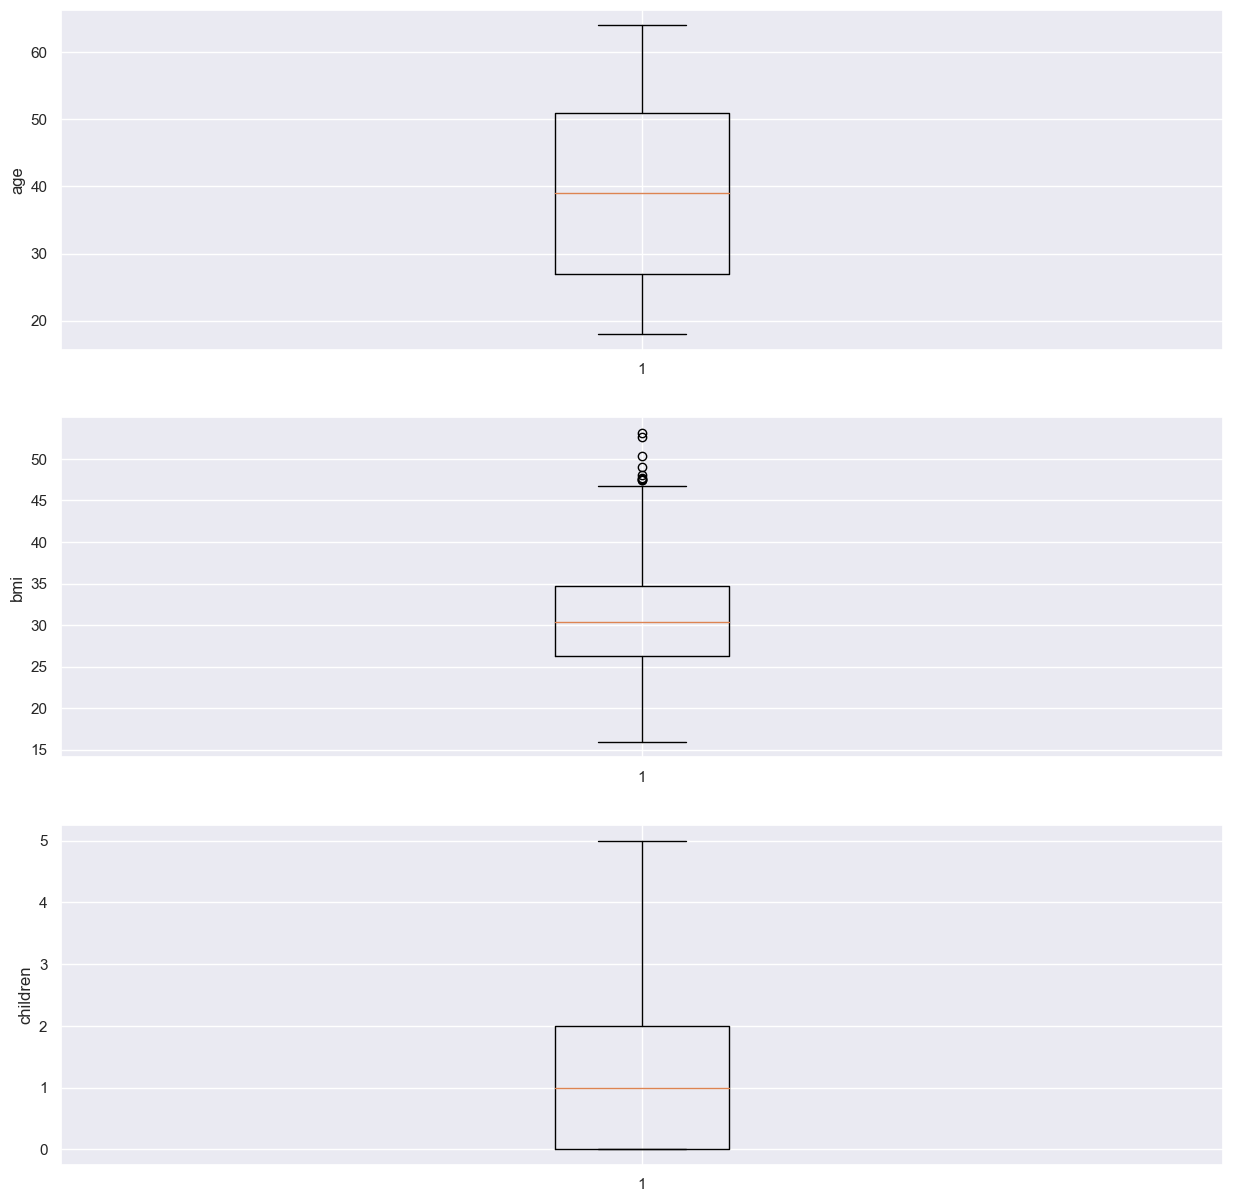

In [254]:
num_col = list(df.select_dtypes(include=np.number))

fig , ax = plt.subplots(nrows=3 , figsize=[15,15])

for i in range(3):
    ax[i].boxplot(df[num_col[i]])
    ax[i].set_ylabel(num_col[i])

age            AxesSubplot(0.125,0.653529;0.227941x0.226471)
bmi         AxesSubplot(0.398529,0.653529;0.227941x0.226471)
children    AxesSubplot(0.672059,0.653529;0.227941x0.226471)
charges        AxesSubplot(0.125,0.381765;0.227941x0.226471)
dtype: object

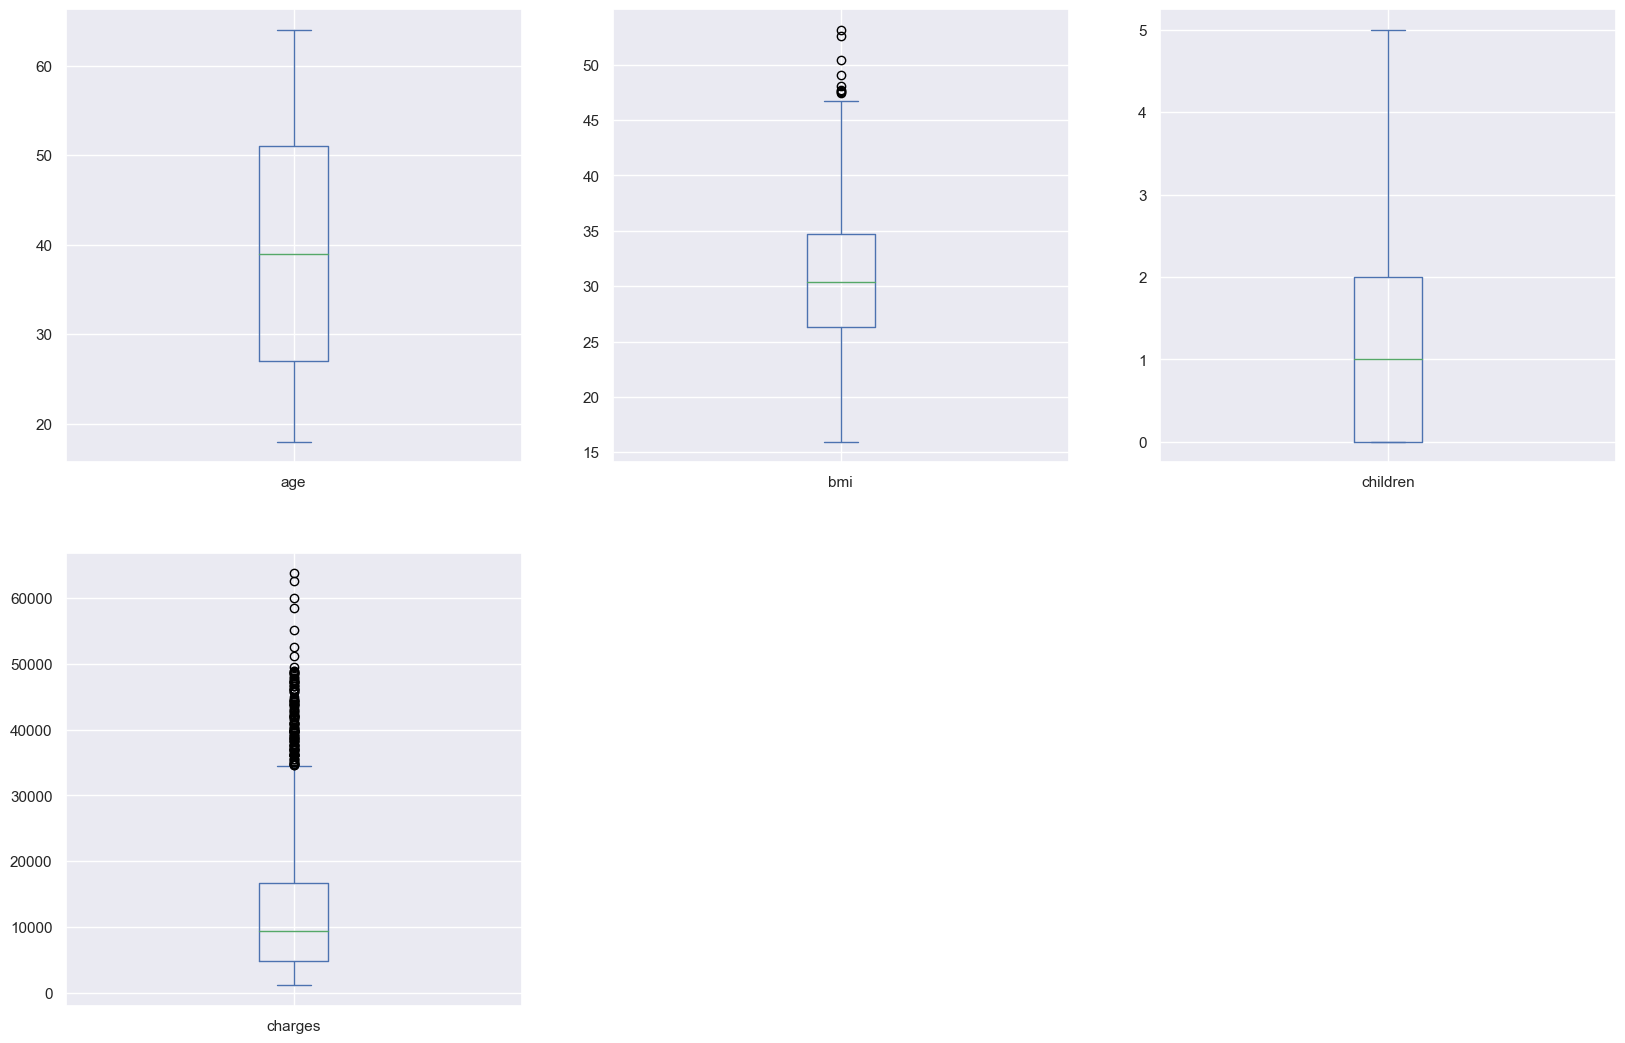

In [255]:
df.plot(kind="box", subplots=True, layout=(3,3), figsize=(20,20))

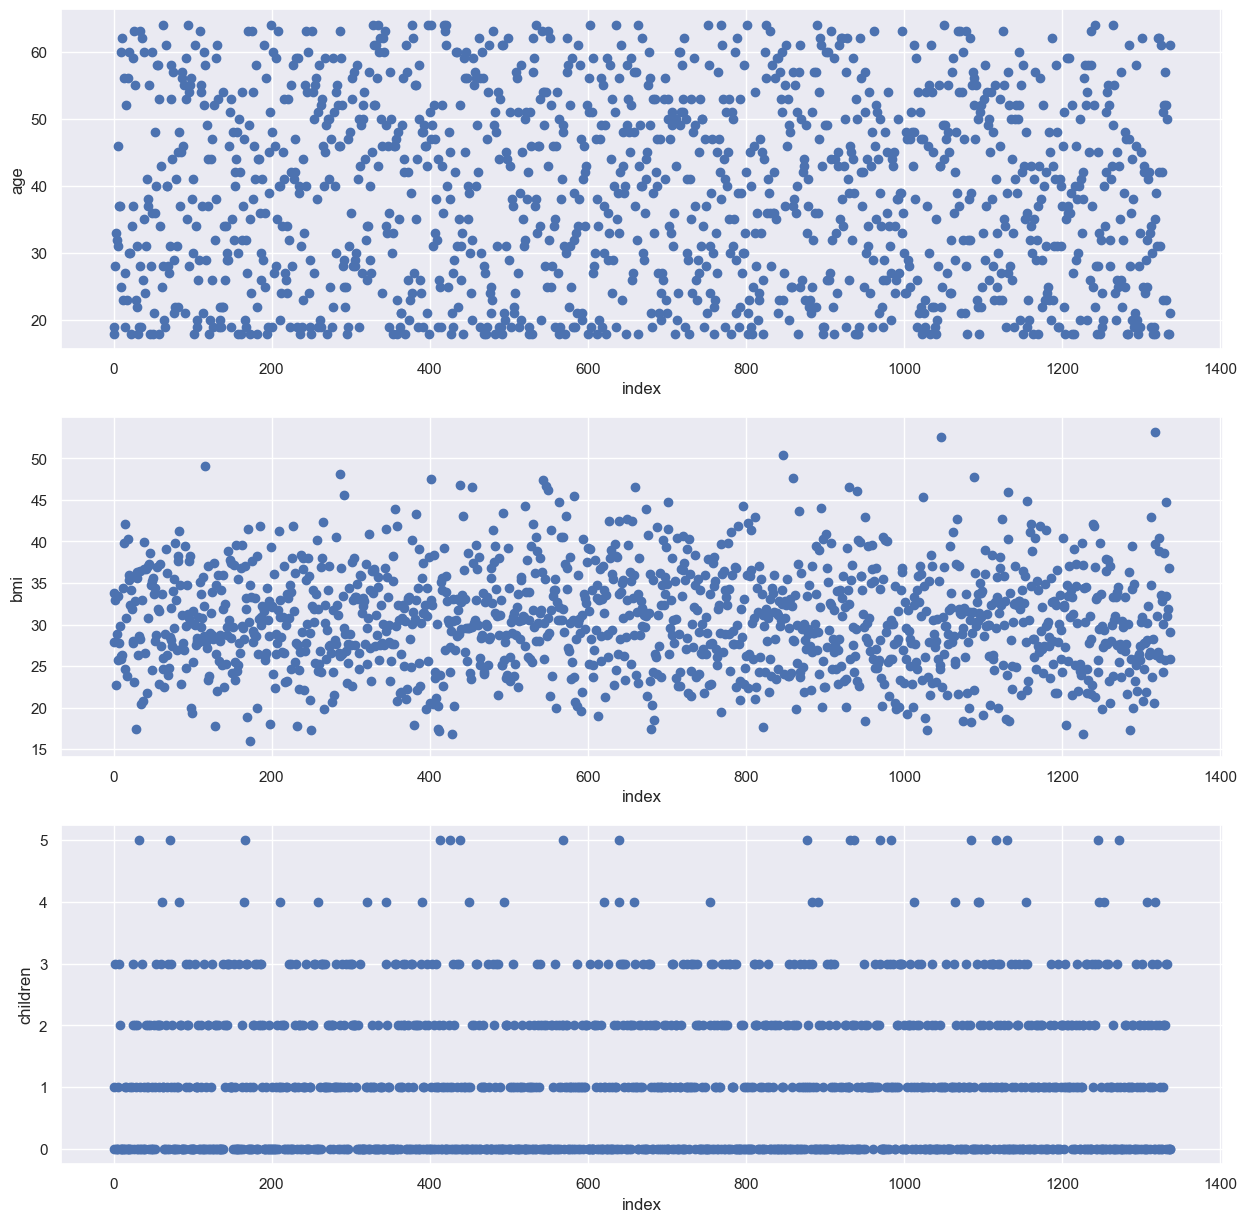

In [256]:
fig , ax = plt.subplots(nrows=3 , figsize=[15,15])

for i in range(3):
    ax[i].scatter(y=df[num_col[i]] , x=df.index)
    ax[i].set_ylabel(num_col[i])
    ax[i].set_xlabel('index')

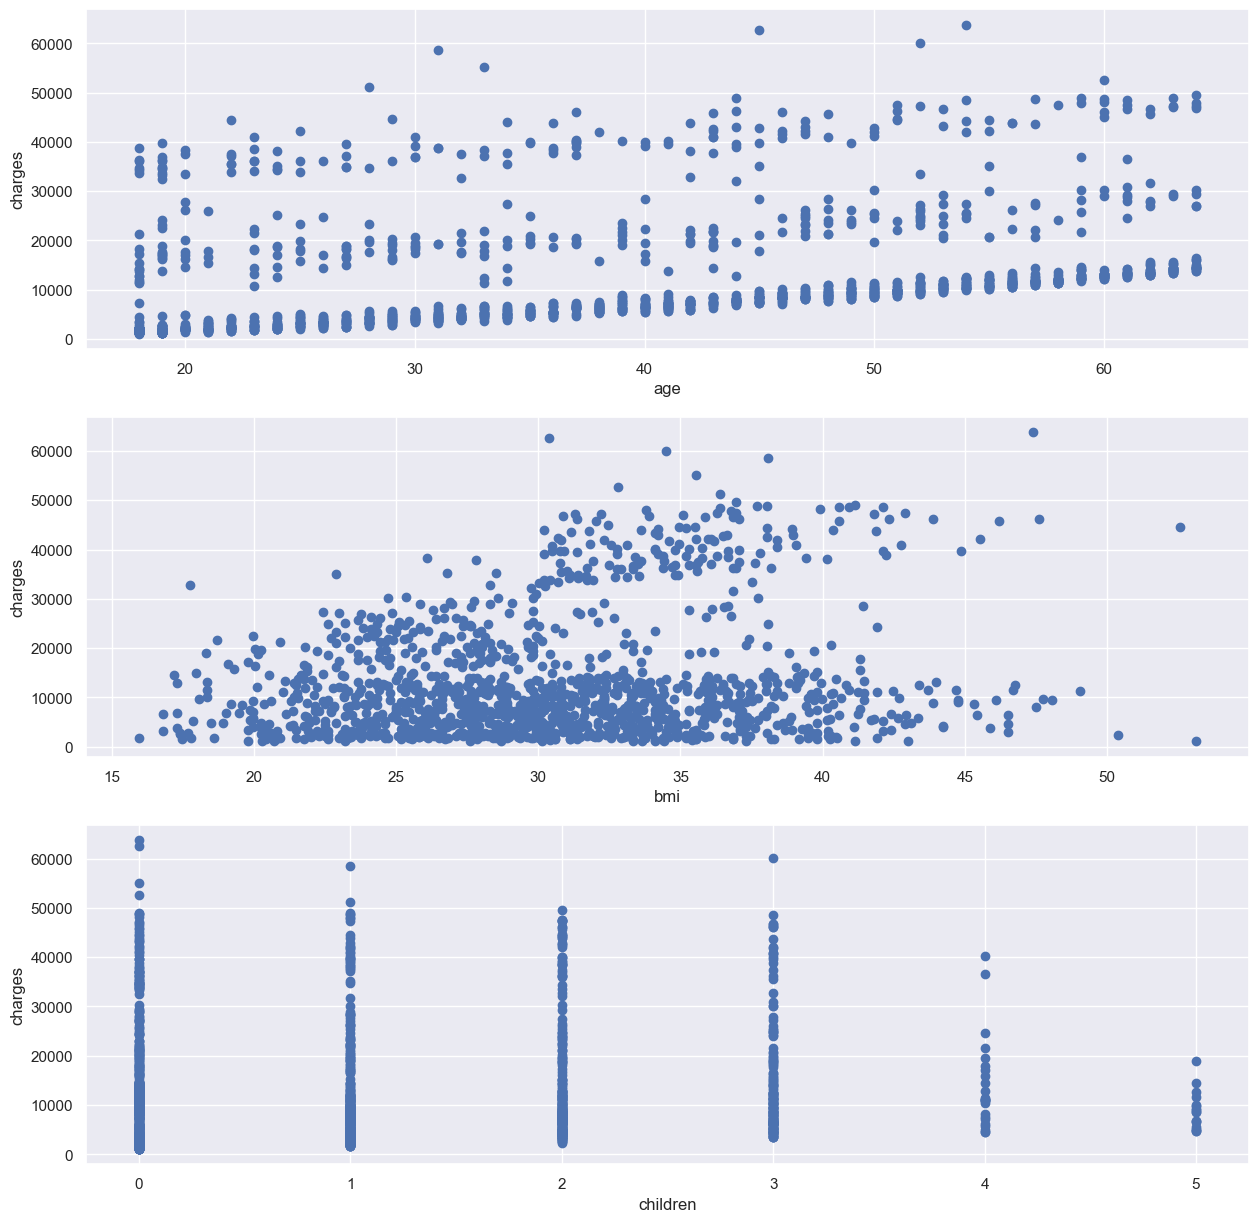

In [257]:
fig , ax = plt.subplots(nrows=3 , figsize=[15,15])

for i in range(3):
    ax[i].scatter(x=df[num_col[i]] , y=df['charges'])
    ax[i].set_xlabel(num_col[i])
    ax[i].set_ylabel('charges')

<AxesSubplot:>

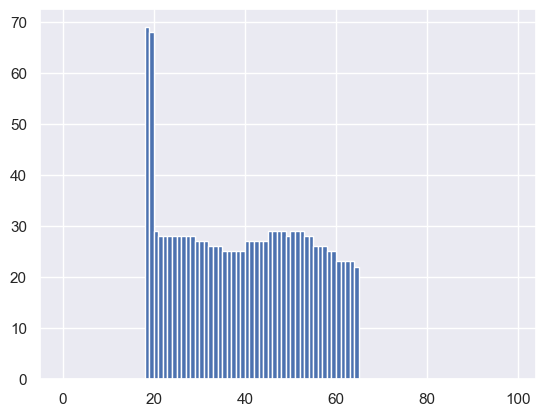

In [258]:
bin_size = np.arange(start = 0 , stop = 100 , step = 1)
df['age'].hist(bins=bin_size)

<AxesSubplot:xlabel='age', ylabel='Density'>

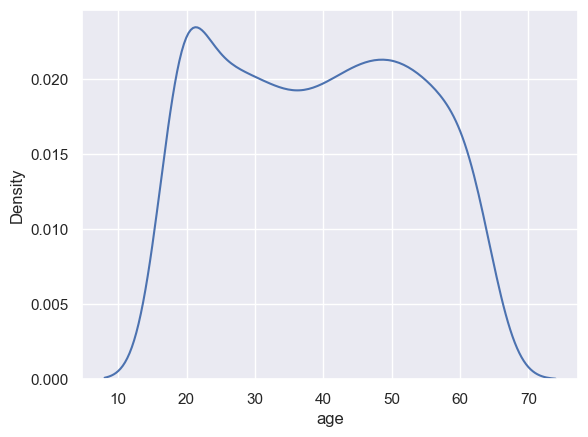

In [259]:
sns.kdeplot(df['age'])

<AxesSubplot:xlabel='children', ylabel='Density'>

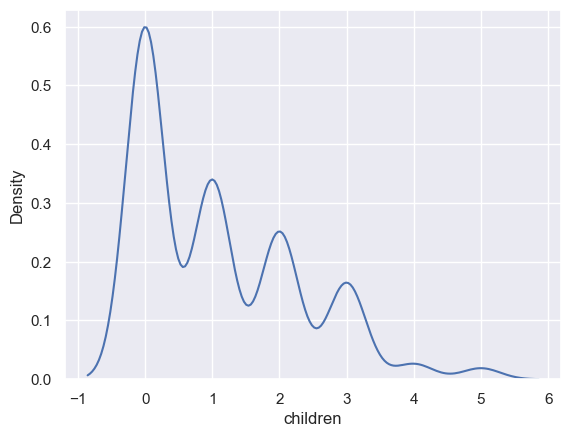

In [260]:
sns.kdeplot(df['children'])

In [261]:
# by all the graphs above there are no outliers present

1. No missing values
2. no outliers
3. there are 3 categorical features
4. train test split should be done
5. scaling is required


In [262]:
df.select_dtypes(include=np.object).nunique()

sex       2
smoker    2
region    4
dtype: int64

In [263]:
#there are less unique values hence i will proceed with get_dummies(one hot encoding)


In [264]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [265]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [266]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [267]:
# for feature sex
dummies = pd.get_dummies(data=df['sex'] , prefix='sex' , drop_first=True) # creating dummies
df.drop(['sex'] , inplace = True , axis = 1) # dropping actual col
df=pd.concat([df,dummies],axis=1) #adding dummies

In [268]:
# for feature region
dummies = pd.get_dummies(data=df['region'] , prefix='region' , drop_first=True) # creating dummies
df.drop(['region'] , inplace = True , axis = 1) # dropping actual col
df=pd.concat([df,dummies],axis=1) 

In [269]:
# for smoker
df['smoker'].replace(['yes','no'],[1,0],inplace=True)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   smoker            1338 non-null   int64  
 4   charges           1338 non-null   float64
 5   sex_male          1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 57.6 KB


In [271]:
df.describe()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265,0.505232,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,0.403694,12110.011237,0.500160,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,0.000000,9382.033000,1.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515,1.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [272]:
x = df.drop(['charges'],axis=1)#feature
y=df['charges']#target

In [273]:
# lets do the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , random_state = 108)


In [274]:
type(y_test)

pandas.core.series.Series

In [275]:
#lets reset the index of all 4
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_train = pd.DataFrame(data=y_train , columns =['charges'])
y_train.reset_index(drop=True,inplace=True)
y_test = pd.DataFrame(data=y_test , columns =['charges'])
y_test.reset_index(drop=True,inplace=True)

In [276]:
y_train.head()

,charges
0,12235.83920
1,2730.10785
2,16577.77950
3,43753.33705
4,22412.64850


In [277]:
#lets do the feature scaling (standardscaler)
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

column = list(x_train.columns)
x_train[column] = scale.fit_transform(x_train[column])
x_test[column] = scale.fit_transform(x_test[column])

In [278]:
x_test.head()

,age,bmi,children,smoker,sex_male,region_northwest,region_southeast,region_southwest
0,-1.439165,-1.060281,-0.052623,-0.544770,-1.051053,-0.583095,1.726325,-0.579265
1,-1.159777,1.251263,-0.052623,1.835638,0.951427,-0.583095,1.726325,-0.579265
2,0.446709,0.033986,0.793551,-0.544770,0.951427,1.714986,-0.579265,-0.579265
3,1.634112,1.521200,-0.898796,-0.544770,-1.051053,-0.583095,-0.579265,1.726325
4,1.494418,-0.985109,-0.898796,-0.544770,-1.051053,-0.583095,1.726325,-0.579265


# Model creation

## Linear Regression

In [283]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test) 

In [284]:
from sklearn.metrics import r2_score , mean_absolute_error
print('R2 Score: ', r2_score(y_test,y_pred_lr))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred_lr))

R2 Score:  0.7651395133219847
********************
MAE:  4122.656423757876


In [285]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
print('R2 Score: ', r2_score(y_test,y_pred_rf))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred_rf))

R2 Score:  0.8537285395767981
****************************************
MAE:  2864.525751338222


In [287]:
from sklearn.linear_model import Ridge

rg = Ridge(alpha=10)
rg.fit(x_train,y_train)
y_pred_rg = rg.predict(x_test) 
print('R2 Score: ', r2_score(y_test,y_pred_rg))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred_rg))

R2 Score:  0.7645218515169465
****************************************
MAE:  4135.730378786869


In [288]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.001)
ls.fit(x_train,y_train)
y_pred_ls = ls.predict(x_test) 
print('R2 Score: ', r2_score(y_test,y_pred_ls))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred_ls))

R2 Score:  0.7651395162754069
****************************************
MAE:  4122.656001962


In [290]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test) 
print('R2 Score: ', r2_score(y_test,y_pred_knn))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred_knn))

R2 Score:  0.7763412282042587
****************************************
MAE:  3689.5444503776116


In [291]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test) 
print('R2 Score: ', r2_score(y_test,y_pred_dt))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred_dt))

R2 Score:  0.6701750335072572
****************************************
MAE:  3482.0202022636813


In [294]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf',C=10000,epsilon=0.1)
svr.fit(x_train,y_train)
y_pred_svr = dt.predict(x_test) 
print('R2 Score: ', r2_score(y_test,y_pred_svr))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred_svr))

R2 Score:  0.6701750335072572
****************************************
MAE:  3482.0202022636813


In [295]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred_gb = gb.predict(x_test) 
print('R2 Score: ', r2_score(y_test,y_pred_gb))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred_gb))

R2 Score:  0.8796808009550224
****************************************
MAE:  2533.7080234165655


In [296]:
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
y_pred_ab = ab.predict(x_test) 
print('R2 Score: ', r2_score(y_test,y_pred_ab))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred_ab))

R2 Score:  0.8228877217203301
****************************************
MAE:  4103.321170460131


In [297]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor()
et.fit(x_train,y_train)
y_pred_et = et.predict(x_test) 
print('R2 Score: ', r2_score(y_test,y_pred_et))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred_et))

R2 Score:  0.8531427385336081
****************************************
MAE:  2677.035761245647


In [298]:
from xgboost import XGBRegressor

xg = XGBRegressor()
xg.fit(x_train,y_train)
y_pred_xg = xg.predict(x_test) 
print('R2 Score: ', r2_score(y_test,y_pred_xg))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred_xg))

R2 Score:  0.8240179915121566
****************************************
MAE:  3100.614443909044


In [302]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor([('lr',lr),('rf',rf),('rg',rg),('ls',ls),('dt',dt),('knn',knn),('svr',svr),('gb',gb),('ab',ab),('et',et),('xg',xg)], weights=[1,1,1,1,1,1,1,1,1,1,1])

voting.fit(x_train,y_train)
y_pred = voting.predict(x_test)
print('R2 Score: ', r2_score(y_test,y_pred))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred))

R2 Score:  0.8627926988260212
****************************************
MAE:  2873.494509217875


In [303]:
from sklearn.ensemble import StackingRegressor
classifier = [('lr',lr),('rf',rf),('rg',rg),('ls',ls),('dt',dt),('knn',knn),('svr',svr),('gb',gb),('ab',ab),('et',et),('xg',xg)]

stacking = StackingRegressor(estimators=classifier , final_estimator = Ridge(alpha=10))
stacking.fit(x_train,y_train)
y_pred = stacking.predict(x_test)
print('R2 Score: ', r2_score(y_test,y_pred))
print('*'*40)
print('MAE: ', mean_absolute_error(y_test,y_pred))



R2 Score:  0.881799491408708
****************************************
MAE:  2499.8053834605753


In [304]:
# So far our model works great with Gradient Boosting algorithm with 87.9 as r2 score
# and also Stacking(with Ridge estimator) and voting works best with 88.1 and 86.2 